In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('bank.csv',sep=';')

In [3]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [4]:
df.job.unique()

array(['unemployed', 'services', 'management', 'blue-collar',
       'self-employed', 'technician', 'entrepreneur', 'admin.', 'student',
       'housemaid', 'retired', 'unknown'], dtype=object)

<AxesSubplot:xlabel='month', ylabel='housing'>

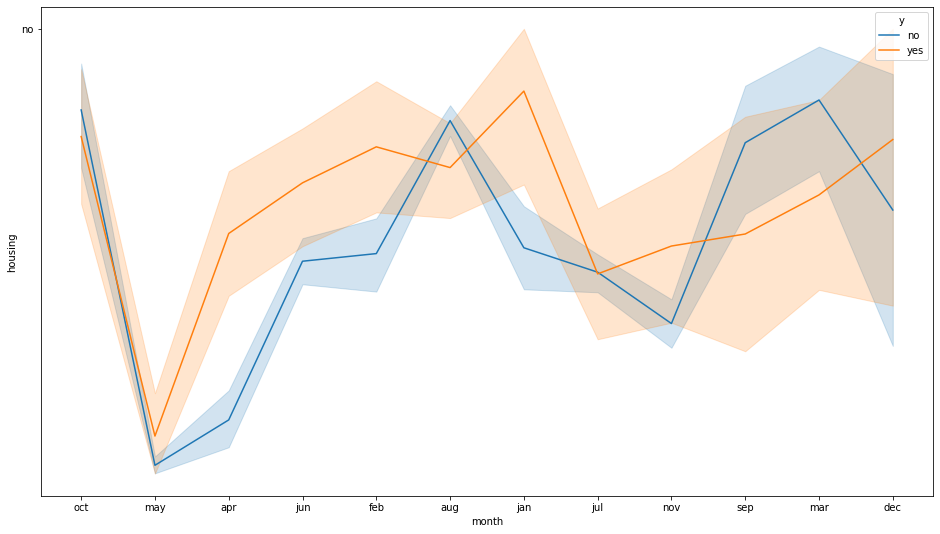

In [18]:
plt.figure(figsize=(16,9))
sns.lineplot(x=df.month,y=df.housing,hue=df.y)

/home/eshaan/.local/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='job', ylabel='count'>

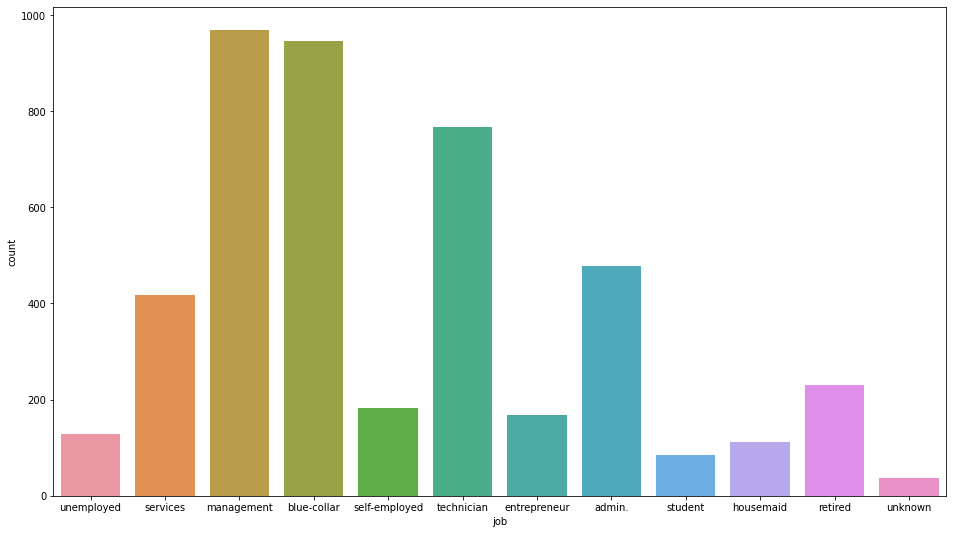

In [5]:
plt.figure(figsize=(16,9))
sns.countplot(df['job'])

/home/eshaan/.local/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='education', ylabel='count'>

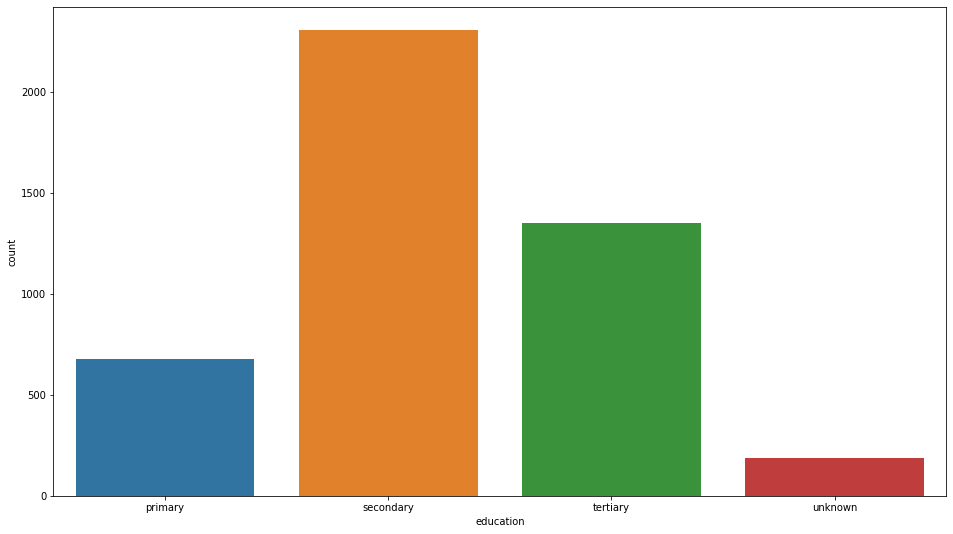

In [6]:
plt.figure(figsize=(16,9))
sns.countplot(df['education'])

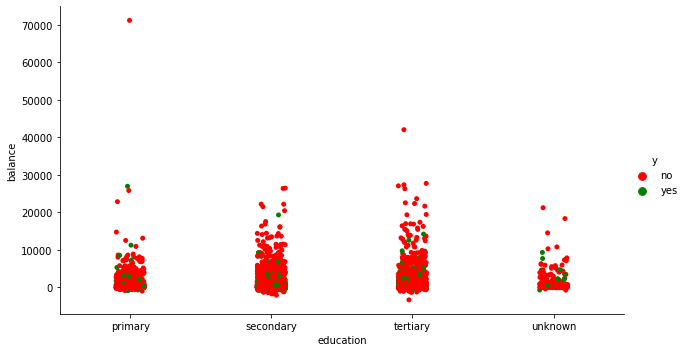

In [15]:
sns.catplot(x='education',y='balance',data=df,aspect=16/9,hue='y',palette=palette)

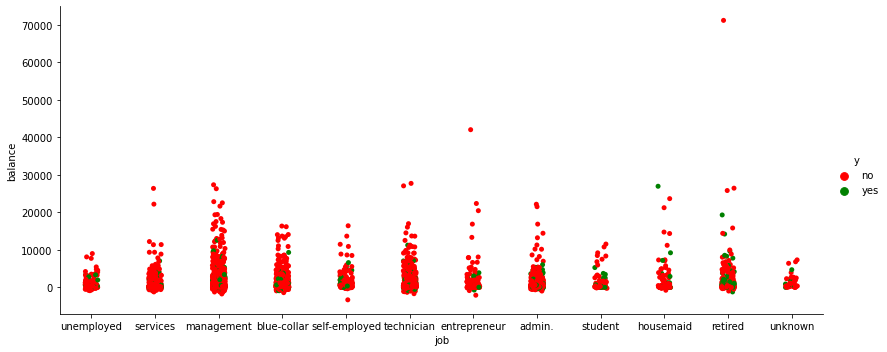

In [14]:
sns.catplot(x='job',y='balance',data=df,aspect=21/9,hue='y',palette=palette)

In [12]:
palette={'yes':'green','no':'red'}

<AxesSubplot:xlabel='job', ylabel='balance'>

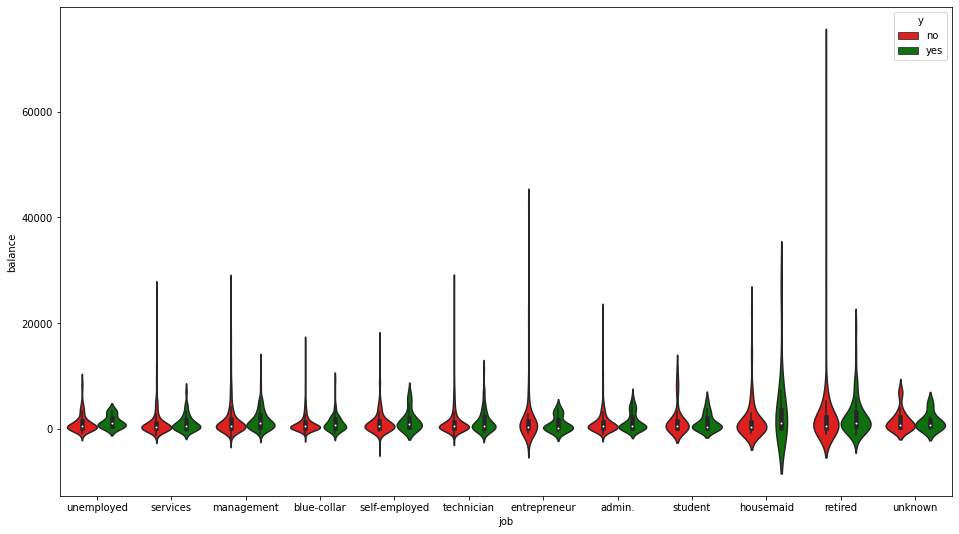

In [13]:
plt.figure(figsize=(16,9))
sns.violinplot(x='job',y='balance',hue='y',data=df,palette=palette)

## Data Preparation

In [25]:
df.dtypes[df.dtypes == 'object'].index.tolist()

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome',
 'y']

In [26]:
# one-hot encoding
data = pd.get_dummies(df,columns=df.dtypes[df.dtypes == 'object'].index.tolist()[:-1])

In [28]:
data.head()

,age,balance,day,duration,campaign,pdays,previous,y,job_admin.,job_blue-collar,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,30,1787,19,79,1,-1,0,no,0,0,...,0,0,0,0,1,0,0,0,0,1
1,33,4789,11,220,1,339,4,no,0,0,...,0,0,1,0,0,0,1,0,0,0
2,35,1350,16,185,1,330,1,no,0,0,...,0,0,0,0,0,0,1,0,0,0
3,30,1476,3,199,4,-1,0,no,0,0,...,1,0,0,0,0,0,0,0,0,1
4,59,0,5,226,1,-1,0,no,0,1,...,0,0,1,0,0,0,0,0,0,1


In [29]:
#label encoding for target
from sklearn.preprocessing import LabelEncoder

In [31]:
data['y'] = LabelEncoder().fit_transform(data['y'])

In [33]:
data.y.unique()

array([0, 1])

## Building the model

In [36]:
from sklearn.model_selection import train_test_split, KFold, LeaveOneOut, ShuffleSplit

In [70]:
x_train,x_test,y_train,y_test = train_test_split(data.drop('y',axis=1),data['y'],test_size=0.2,random_state=100)

In [71]:
from sklearn.linear_model import LogisticRegression

In [72]:
model = LogisticRegression().fit(x_train,y_train)

/home/eshaan/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [73]:
model.classes_

array([0, 1])

In [41]:
model.n_iter_

array([100], dtype=int32)

In [74]:
pred = model.predict(x_test)

In [75]:
model.score(x_test,y_test)

0.9049723756906077

In [76]:
model.score(x_train,y_train)

0.8910398230088495

In [81]:
from sklearn.preprocessing import StandardScaler

In [84]:
x_train,x_test,y_train,y_test = train_test_split(StandardScaler().fit_transform(data.drop('y',axis=1)),data['y'],test_size=0.2,random_state=100)

In [85]:
model_s = LogisticRegression().fit(x_train,y_train)

In [86]:
model_s.score(x_test,y_test)

0.912707182320442

In [87]:
pred = model_s.predict(x_test)

In [88]:
model_s.score(x_train,y_train)

0.900995575221239

In [89]:
from sklearn.metrics import roc_curve, roc_auc_score

In [90]:
fpr,tpr,_ = roc_curve(y_test,pred)

In [91]:
auc=roc_auc_score(y_test,pred)

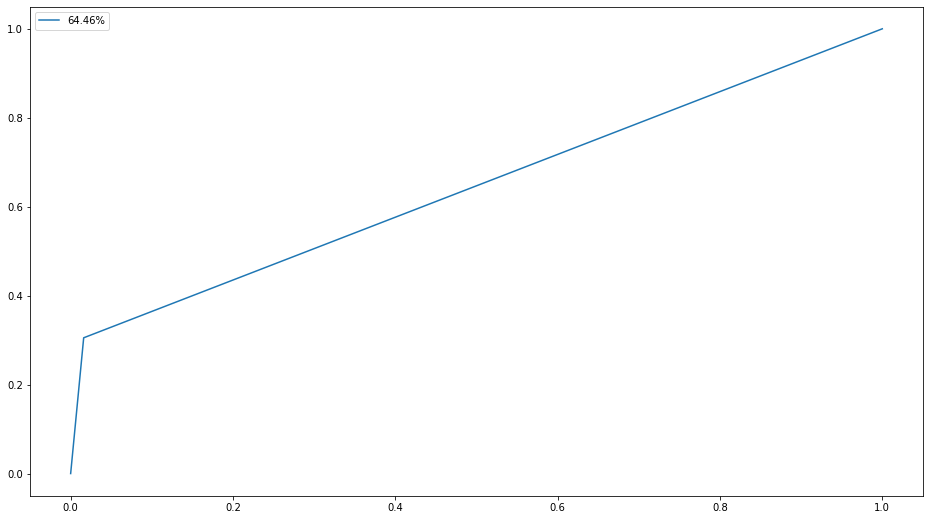

In [92]:
plt.figure(figsize=(16,9))
plt.plot(fpr,tpr,label = str(round(auc*100,2)) + '%')
plt.legend(loc='best')

In [93]:
x_train,x_test,y_train,y_test = train_test_split(data.drop('y',axis=1),data['y'],test_size=0.2,random_state=100)

In [94]:
pred = model.predict(x_test)

In [95]:
fpr,tpr,_ = roc_curve(y_test,pred)

In [96]:
auc=roc_auc_score(y_test,pred)

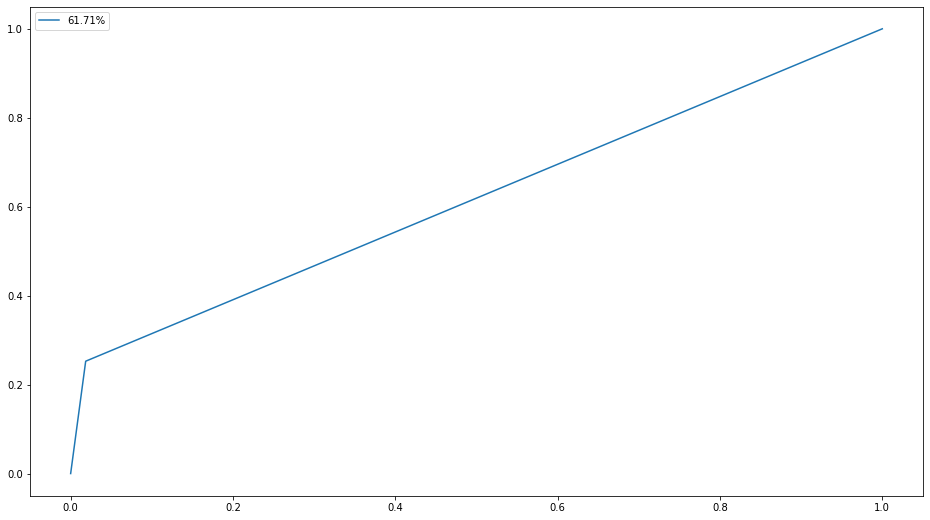

In [97]:
plt.figure(figsize=(16,9))
plt.plot(fpr,tpr,label = str(round(auc*100,2)) + '%')
plt.legend(loc='best')

In [98]:
from sklearn.model_selection import cross_val_score

```python
loocv = LeaveOneOut()
model = LogisticRegression()
l_score = cross_val_score(model,data.drop('y',axis=1),data['y'],cv=loocv)
```